<a href="https://colab.research.google.com/github/SamaSamrin/Toyota-Cars-EDA/blob/main/TOYOTA_car_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("toyota.csv")
display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


None

In [ ]:
df['fuelType'].value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

# Pie Chart & Bar Plot for FUEL TYPE


---


**The Pie Chart**

**Pros:** represents the ratio of four fuel types more vibrantly and makes it easier to see

**Cons:** corresponding percentages may overlap (especially of "Other" and "Diesel")

---

**The Bar Plot**

**Pros:** presents the exact numbers of Fuel Types in the selected vehicles. Overlapping can be resolved easily with "rotate"

**Cons:** harder to show  percentages than pie chart

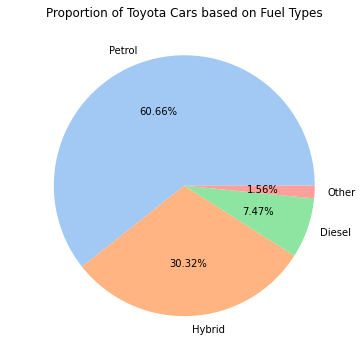

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Proportion of Toyota Cars based on Fuel Types")
df['fuelType'].value_counts().plot(kind='pie', autopct="%1.2f%%", colors=sns.color_palette('pastel'))
plt.ylabel(" ")
plt.show(" ")

Text(0, 0.5, 'Number of Cars')

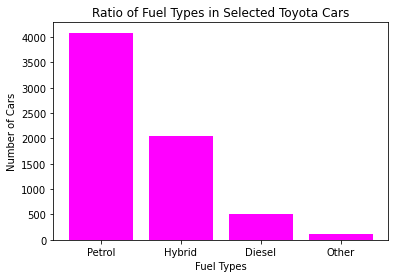

In [ ]:
df_fuelType = pd.DataFrame(df['fuelType'].value_counts())

df_fuelType_newindex = df_fuelType.reset_index()

df_fuelType_final = df_fuelType_newindex.rename(columns={"index":"fuelType", "fuelType":"Number of Cars"})

#display(df_fuelType_final)
plt.title("Ratio of Fuel Types in Selected Toyota Cars")
plt.bar(df_fuelType_final["fuelType"], df_fuelType_final["Number of Cars"], color='magenta')
plt.xlabel("Fuel Types")
plt.ylabel("Number of Cars")
#plt.show('') - displaying the graph twice

## Scatter Plot

***Plot 1 Observations:***

*   The price and the mileage have an inversely proportional relationship, or a negative correlation. Lower mileage dictates newer status of the car, which can contribute to its higher price. 
*   Most of the cheapest cars have manual transmission, the most expensive ones are semi-auto and the mid-range ones have automatic transmission. 
*   Most cars have a mileage lower than 100,000 and cost less than 40,000.

***Plot 2 Observations:***
*   Most of the newer models seem to be of higher price, so the year and the price values have a positive correlation. 
*   Most models were launched after 2010.
*   The majority of models launched between 2005 and 2019 have manual transmission. There is hardly any model with semi-auto transmission before 2015.

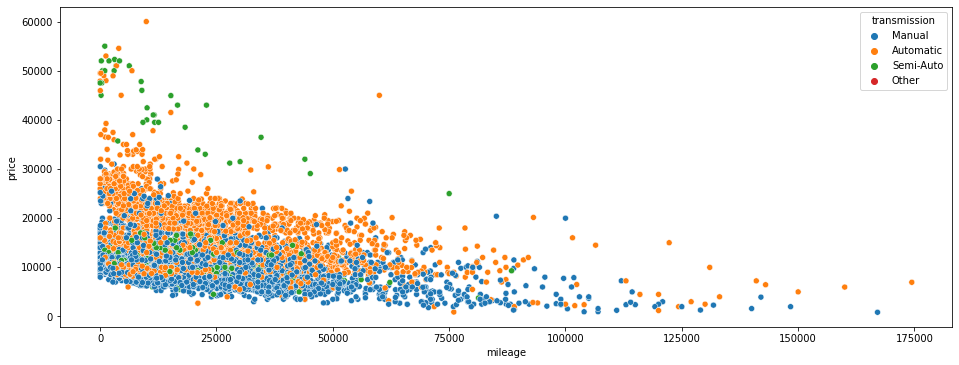

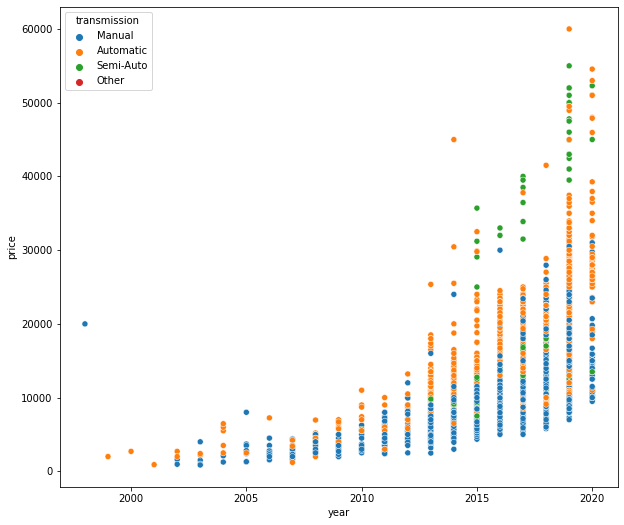

In [ ]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df, hue="transmission")
plt.show()

plt.figure(figsize=(10,30))
plt.subplot(3,1,2)
sns.scatterplot(x='year', y='price', data=df, hue="transmission")
plt.show()

## Regression Plot

**Plot 1** shows a **downward Trend Line** confirming the negative correlation and **Plot 2** shows an **upward Trend Line** confirming the positive correlation.

Due to the density of data points in Plot 1, their colors and edge colors have been altered.



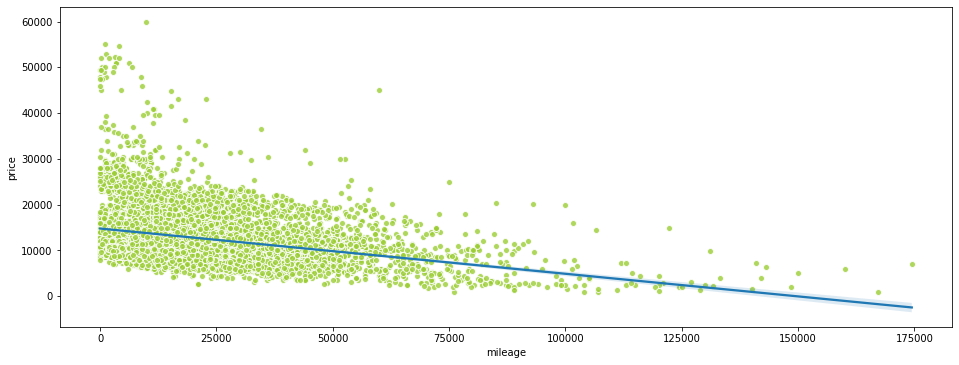

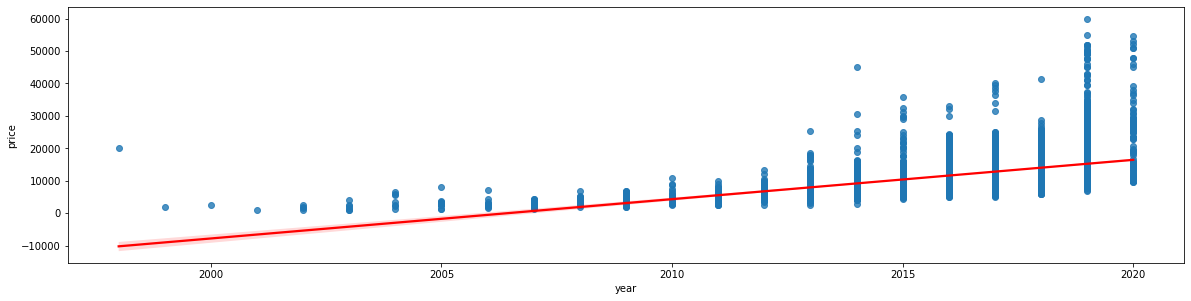

In [ ]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
sns.regplot(x='mileage', y='price', data=df, scatter_kws={"color":"yellowgreen", "edgecolor":"white"})
plt.show()

plt.figure(figsize=(20,16))
plt.subplot(3,1,2)
sns.regplot(x='year', y='price', data=df, line_kws={"color":"red"})
plt.show()

##Pair Plot

Hue doesn't seem to help any plot except **Year-Price** and **Mileage-Price**.

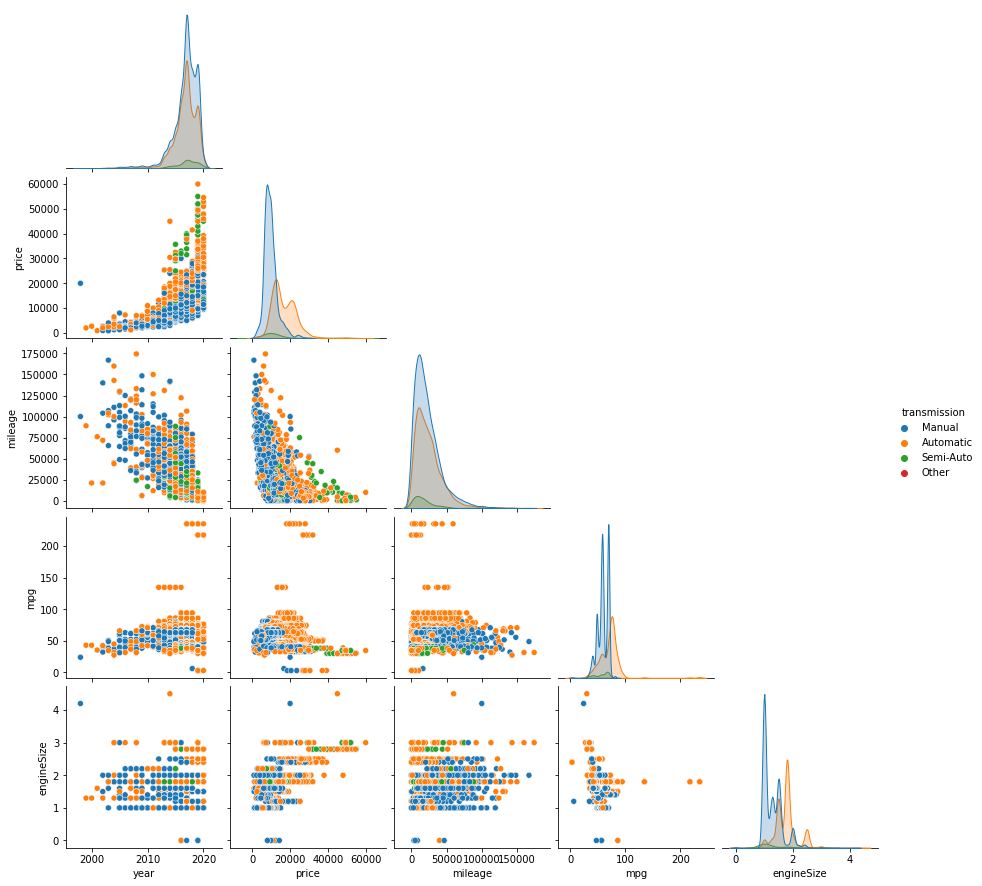

In [ ]:
sns.pairplot(df, corner=True, hue="transmission")
plt.show()

In [ ]:
#checking ranges of values again

display(df.describe())

,year,price,mileage,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,15.836710,0.436159
min,1998.000000,850.000000,2.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,235.000000,4.500000


## Histogram

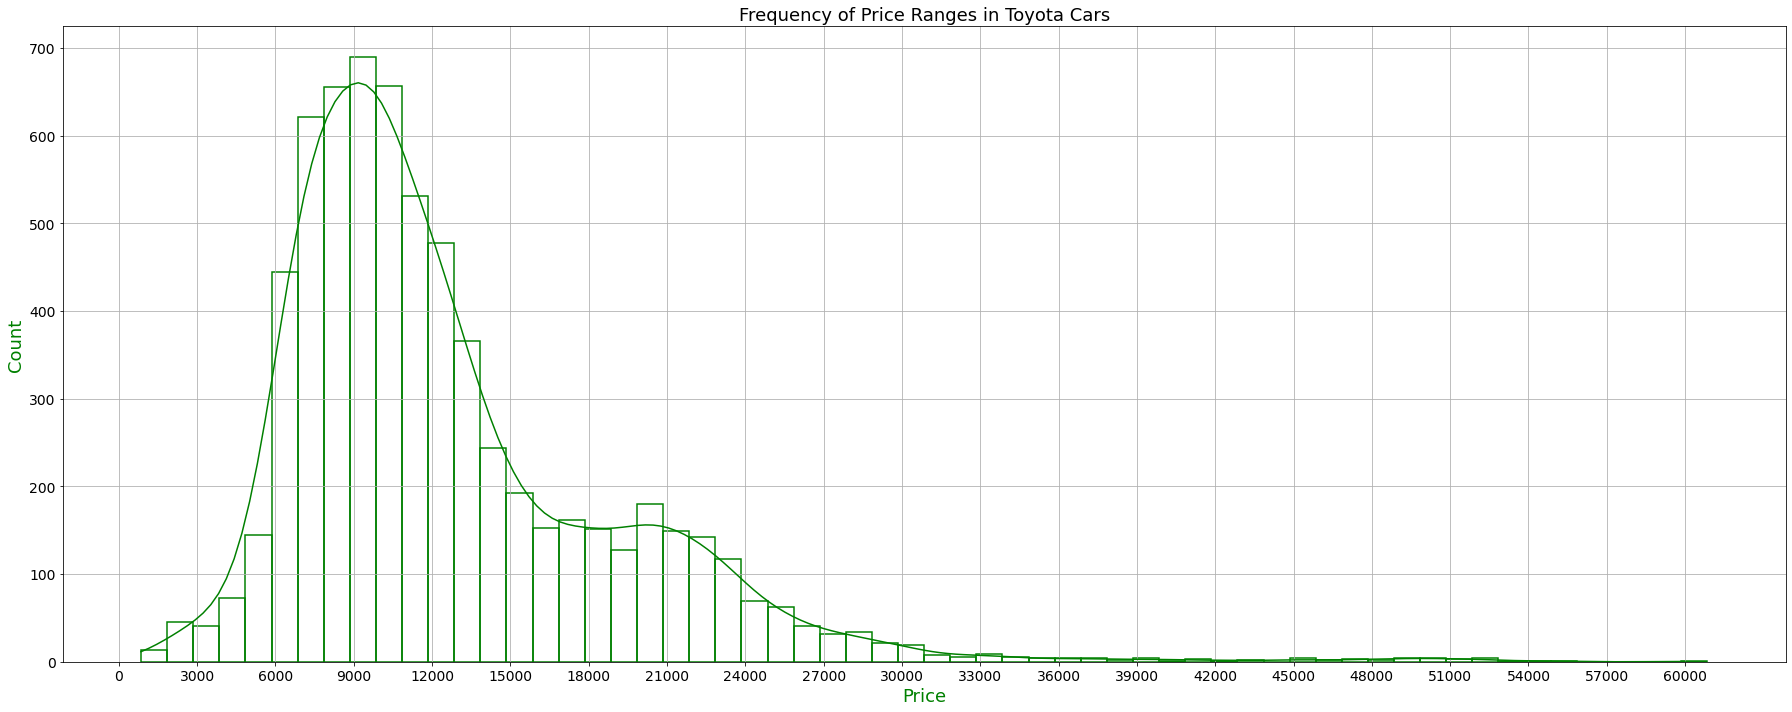

In [ ]:
plt.figure(figsize=(25,10))

sns.histplot(x="price", data=df, binwidth=1000, kde=True, color="green", fill=False)
plt.title("Frequency of Price Ranges in Toyota Cars", fontsize=18)
plt.xticks(np.arange(0,60001,3000), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Price", fontsize=18, color='green')
plt.ylabel("Count", fontsize=18, color='green')
plt.grid()

plt.tight_layout()
plt.show()

**Observations**

- The KDE curve shows positive skew where the median or peak is visible on the left side
- Most cars belong to the price range of 7,000-11,000, where the median value 10,795 also lies

## Box Plot

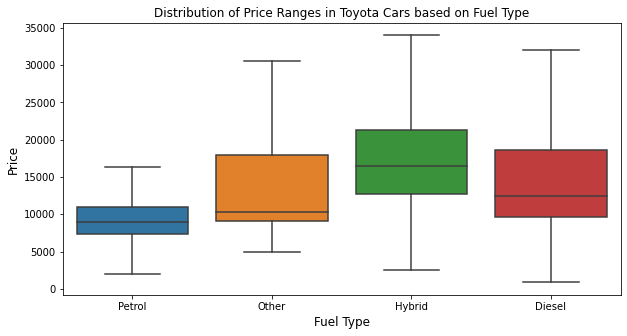

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Price Ranges in Toyota Cars based on Fuel Type')
sns.boxplot(y = "price", data=df, showfliers=False, x="fuelType")

plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

**Observations**

- Even though the price range of "Other" is much wider than "Petrol", their medians are very close (9000-10000)
- Toyota models running on Petrol are the most affordable
- Cars running on Hybrid fuel come in the most versatile price range

## Violin Plot

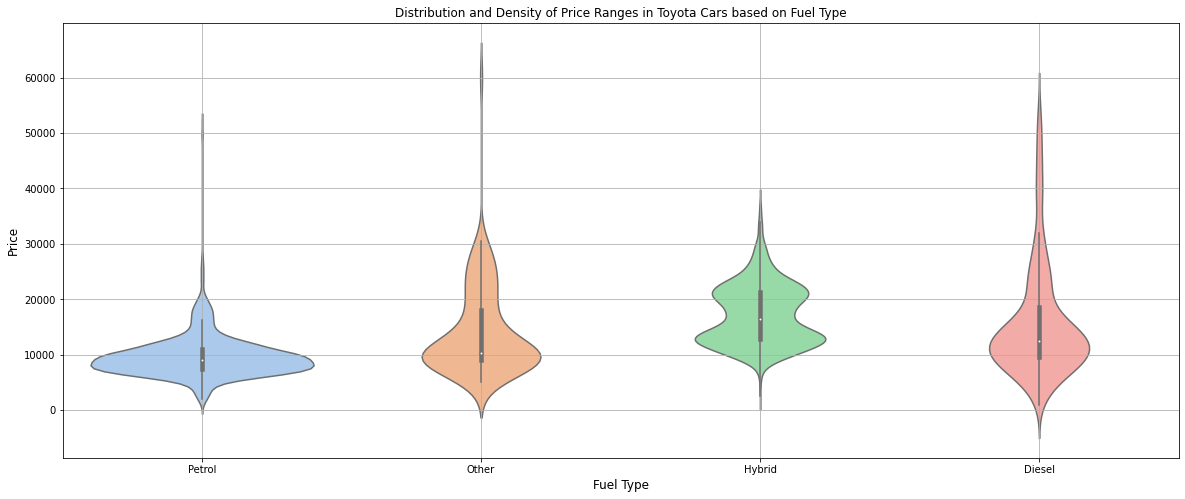

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Distribution and Density of Price Ranges in Toyota Cars based on Fuel Type')
sns.violinplot(y = "price", data=df, showfliers=False, x="fuelType", palette=sns.color_palette('pastel'))

plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid()
plt.show()

**Observations**
- Petrol cars in the dataset have the highest density around the price point of 8000
- All models seem to have a substantial density around the price range of 8,000-13,000

## Box Plot or Violin Plot - Which is Better?

While both are easier to read than other visualizations like Scatter Plot, **Box Plot** seems to provide more information regarding average, maximum, minimum, median and percentile values. 